# 🔬 Güç Analizi: Kaç Kişiye Bakmalıyım?

## Giriş: Veri Toplamak Ücretsiz Değil

Diyelim ki yeni bir ürün tasarımı yaptın.  
AB testi yapmak istiyorsun.  
Ama kaç kişiye bu testi uygulamalısın ki farkı yakalayasın?

> “İstatistiksel güç, doğru karar verme yeteneğidir.  
Yeterli örneklem olmadan → güçlü karar da olmaz.”  

## 🧠 Güç Nedir?

**Güç**, aslında:
> “Gerçek bir fark varken onu tespit edebilme olasılığıdır.”

📌 Matematiksel olarak:
$$
\text{Güç} = 1 - \beta
$$

| Terim | Anlamı |
|-------|---------|
| **β (Tip II hata)** | Gerçek fark varken fark olmadığını söylemek |
| **Güç (Power)** | Gerçek fark varsa, bunu tespit etme olasılığı |

📌 Genellikle `güç ≥ 0.80` alınır.  
Yani %80 ihtimalle gerçek farkı görebilmeyi garanti altına alırız.

## ⚖️ Güç Analizinin Temel Bileşenleri

4 ana unsur vardır:

| Bileşen | Açıklama |
|--------|----------|
| **α (Anlamlılık düzeyi)** | Yanılma payımız (%5 genellikle) |
| **n (Örneklem büyüklüğü)** | Kaç kişiye bakacağımız |
| **Etki Büyüklüğü (effect size)** | Fark ne kadar büyükse o kadar az örnekle yeterli olur |
| **Güç (power)** | Testin farkı tespit edebilme yeteneği |

📌 Bu dördüz arasında bir denge vardır.  
Herhangi üçünü belirleyince dördüncüyü hesaplayabilirsin.

### 📊 Güç Analizi Nasıl Yapılır?

1. **α (Anlamlılık Düzeyi)**: Genellikle %5 kullanılır. Bu, testin yanlış bir şekilde anlamlı bulma olasılığıdır.
2. **n (Örneklem Büyüklüğü)**: Kaç kişi üzerinde deneyeceğiz.
3. **Etki Büyüklüğü**: Farkın ne kadar büyük olması bekleniyor? (Küçük, Orta, Büyük)
4. **Güç (Power)**: Testin farkı tespit edebilme yeteneği. Genellikle %80 veya %90 kullanılır.

## 📊 Güç Analizi Ne Zaman Gerekir?

| Durum | Açıklama |
|--------|----------|
| ✅ **A/B testi planlıyorsan** | Kaç kullanıcıya göstermelisin? |
| ✅ **Klinik deneylerde** | İlacın etkisini görmek için kaç hasta izlenmeli? |
| ✅ **Anket çalışmasında** | Sonuçları güvenilir kılmak için kaç kişi katılmali? |
| ✅ **Hipotez testi yaparken** | Yeterli örneklem sayısını belirlemek için |

📌 Düşük örneklem → yanlış negatif sonuçlar  
Yüksek örneklem → zaman ve kaynak israfı

## 🛠️ Python Kodu ile Güç Analizi Yapmak

In [2]:
from statsmodels.stats.power import TTestIndPower

# Sample parametreler
etki_buyuklugu = 0.5   # orta etki
alfa = 0.05           # yanılma payı
guven_duzeyi = 0.80   # 80% güç

# Güç analizi objesi
analiz = TTestIndPower()

# Gerekli örneklem sayısını hesapla
orneklem_sayisi = analiz.solve_power(effect_size=etki_buyuklugu,
                                     power=guven_duzeyi,
                                     alpha=alfa,
                                     alternative='two-sided')

print(f"Gerekli örneklem sayısı: {orneklem_sayisi:.0f}")

Gerekli örneklem sayısı: 64


📌 Bu çıktı şunu anlatıyor:
- Ortalama etki büyüklüğüyle (örneğin Cohen’s d = 0.5)
- %95 güven düzeyinde
- %80 güçle farkı yakalayabilmek için → her grupta 64 kişilik örneklem yeterlidir.

## 📐 Güç Analizini Etkileyen Unsurlar

### a) **Etki Büyüklüğü Artarsa**
→ Gerekli örneklem sayısı azalır  
Yani büyük farkı daha küçük veriyle bile görürsün

### b) **Güç Seviyesi Artarsa (örneğin 0.90’a çıkarsa)**
→ Gerekli örneklem artar  
Daha yüksek güven → daha fazla veri demektir

### c) **Alfa seviyesi küçülürse (örneğin 0.01’e inerse)**
→ Gerekli örneklem artar  
Çünkü artık daha az Tip I hatası kabul edebiliriz.

## 📋 Etki Büyüklüğü (Effect Size) Nedir?

Etki büyüklüğü, farkın **pratikte ne kadar önemli olduğunu** ölçer.

### Örnek: Cohen's d

$$
d = \frac{\bar{x}_1 - \bar{x}_2}{s}
$$

📌 Yorumlama kılavuzu:
| d değeri | Yorum |
|----------|--------|
| 0.2      | Küçük etki |
| 0.5      | Orta etki |
| 0.8      | Büyük etki |

In [4]:
import numpy as np

def cohen_d(group1, group2):
    return (np.mean(group1) - np.mean(group2)) / np.sqrt((np.var(group1) + np.var(group2)) / 2)

# Simülasyon verisi
np.random.seed(42)
grup1 = np.random.normal(loc=75, scale=10, size=100)
grup2 = np.random.normal(loc=80, scale=10, size=100)

print("Cohen’s d:", cohen_d(grup1, grup2))

Cohen’s d: -0.6758030541389607


📌 Yorum: Orta düzeyde bir etki var → örneklem sayımız da ~64 kişi olmalı

## 📈 Grafiksel Gösterim: Güç vs Örneklem Sayısı

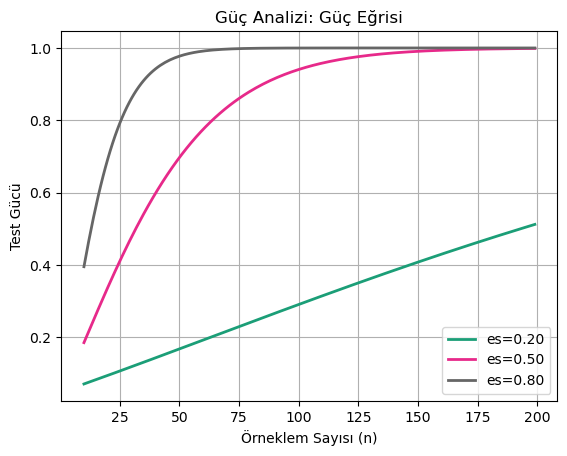

In [5]:
import matplotlib.pyplot as plt

fig = analiz.plot_power(dep_var= 'nobs', nobs=np.arange(10, 200), effect_size=[0.2, 0.5, 0.8])
plt.title("Güç Analizi: Güç Eğrisi")
plt.xlabel("Örneklem Sayısı (n)")
plt.ylabel("Test Gücü")
plt.grid(True)
plt.show()

📌 Bu grafikte:
- Her etki büyüklüğü için farklı güç eğrileri
- Noktalar, belirli bir güç düzeyine ulaşmak için gereken örneklem sayısını gösteriyor

## 🤔 Güç Analizi Hangi Testlerde Kullanılır?

| Test Türü | Güç Analizi İçin Kullanılan Fonksiyon |
|-----------|--------------------------------------|
| **T-testi (bağımsız)** | `TTestIndPower` |
| **Paired T-testi** | `TTestPower` |
| **Oran testi (Z-testi)** | `GofChisquarePower`, `ProportionPower` |
| **ANOVA** | `FTestAnovaPower` |

#### Örnek: ANOVA için Güç Hesabı

In [6]:
from statsmodels.stats.power import FTestAnovaPower

anova_analiz = FTestAnovaPower()
etki_f = 0.25  # orta etki
n_gerekli = anova_analiz.solve_power(effect_size=etki_f, power=0.8, alpha=0.05, k_groups=3)
print(f"3 grup için gerekli örneklem: {n_gerekli:.0f}")

3 grup için gerekli örneklem: 157


📌 Yani toplamda 156 kişi → her grupta ~52 kişi anlamına gelir.

## 📉 Güç Analizi ve Hipotez Testi Bağlantısı

| Karar | Gerçek Durum |
|--------|--------------|
| **H₀ reddedildi** | Fark var |
| **H₀ reddedilemedi** | Fark yok veya örneklem yetersiz olabilir |

📌 Eğer **gerçekten fark var** ama biz onu göremediysen → **Tip II hata** yapıldı demektir.

> “Güç analizi, bu hatayı yapmamak için  
önemli olan minimum veri miktarını gösterir.”  

## 📌 Güç Analizi ve Kaynak Optimizasyonu

Güç analizi aynı zamanda maliyet optimizasyonudur.

| Senaryo | Açıklama |
|--------|-----------|
| Çok az kişiye bakarsan → p-değeri anlamsız kalabilir | Tip II hataya açık |
| Çok fazla kişiye bakarsan → işlem maliyetli olur | Tip I hataya karşı koruyucu ama maliyetli
